In [1]:
import codecs
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
base = sqlite3.connect ('fishing.db')

In [3]:
df = pd.read_sql("select g.gd,g.bet,s.player_name,s.place,s.points from score s join game g on s.game_id = g.id", base)

In [4]:
df.gd = df.gd.apply(pd.to_datetime)

# Определение очков за уму

In [5]:
def uma(place):
    if place ==1:
        u = 25000
    elif place ==2:
        u = 10000
    elif place ==3:
        u = -10000
    elif place ==4:
        u= -25000
    return u

# Выбираем период расчета

In [6]:
df = df[df.gd > pd.datetime(2010,1,1)]

# Определение выигранного вэлью за ханчан

In [7]:
df['umapoints'] = df['place'].apply(uma)
df['val'] = (df['bet']/100)*(((df['points']-25000+df['umapoints'])))

# Расчет статистики по выигранному валуе и построение графика профита

In [8]:
#среднее место
df_avg = df.drop(df.columns[[1,4,5,6]],1)
df_avg = df_avg.groupby('player_name').mean()
df_avg.sort_values('place', ascending = True)

,place
player_name,
Афонин Михаил,1.500000
Лисихина Людмила,2.000000
Чечин Вадим,2.000000
Кваша Илья,2.000000
Моримото Юки,2.083333
Белоусова Марина,2.166667
Ли Венлон,2.166667
Худяков Сергей,2.186047
Богачев Павел,2.250000


In [9]:
#подготовка датафрейма
df_val = df.drop(df.columns[[1,3,4,5]],1)
df_val_sum = df_val.groupby('player_name').sum()
#общий профит
df_val_sum.sort_values('val', ascending = False)

,val
player_name,
Леонтьев Алексей,54557.0
Алешин Сергей,52862.0
Гришин Виктор,50970.0
Мартынов Иван,45175.0
Плясунов Владислав,20446.0
Павлов Георгий,13834.0
Васильев Сергей,12597.0
Моримото Юки,12051.0
Сироткин Дмитрий,11621.0


In [10]:
#общее число ханчанов
df_val['player_name'].value_counts()

Черных Анастасия       907
Алешин Сергей          865
Леонтьев Алексей       799
Гришин Виктор          691
Плясунов Владислав     592
Васильев Сергей        590
Павлов Георгий         416
Петрущенко Сергей      402
Гоголев Максим         258
Троценко Филипп        221
Смоленцев Виктор       205
Проскурякова Ольга     196
Мартынов Иван          188
Манджиев Арслан        152
Фудзи Кейске           150
Сироткин Дмитрий       117
Наданьян Владимир       96
Жевленев Егор           91
Усманов Рамиль          84
Ким Евгений             58
Ткаченко Никита         47
Худяков Сергей          43
Гуркина Наталья         40
Моримото Юки            36
Горячева Елена          29
Козлов Виктор           26
Богатиков Александр     20
Белоусова Марина        12
Бобров Валентин         12
Патрикеев Павел         11
Коновалов Михаил        11
Хаипов Эдуард            9
Божедонов Александр      8
Лисихин Алексей          6
Ли Венлон                6
Лисихина Людмила         5
Кретов Никита            4
Б

In [12]:
#по конкретному игроку и за период
df_player = df_val[(df_val.player_name == u'Петрущенко Сергей') & (df_val.gd >= pd.datetime(2014,1,1))]
#подготовительный расчет
s =[]
sum = 0
for i in df_player['val']:
    sum = sum + i 
    s.append(sum)

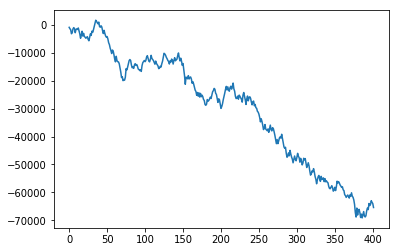

In [13]:
#построение графика (х:ханчаны, у:валуе)
plt.plot(s)